# 기존 모델로 예측 결과 확인


In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 2차원 데이터로 변환(각각의 데이터는 샘플이라 부름)
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [2]:
# 넘파이 모듈 import하기
import numpy as np 

# 생선 데이터로 numpy 배열 생성(input, target)
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

# 랜덤한 index 구하기
 # 항상 동일한 결과를 위해 지정함
np.random.seed(1)
index = np.arange(49)
np.random.shuffle(index)

# 넘파이의 배열 인덱싱으로 훈련데이터와 테스트 데이터 나누기
X_train = input_arr[index[:35]]
y_train = target_arr[index[:35]]

train_input = X_train
train_target = y_train

X_test = input_arr[index[35:]]
y_test = target_arr[index[35:]]

test_input = X_test
test_target = y_test

In [3]:
# KNeighborsClassifier 임포트하기
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier 객체 생성
model = KNeighborsClassifier()

# 학습하기
model.fit(X_train, y_train) #model.fit(train_input, train_target)

# 모델 정확도 평가 점수 확인
model.score(test_input, test_target) # model.score(X_test, y_test)

1.0

In [5]:
model.predict([[25,150]]) 

array([0])

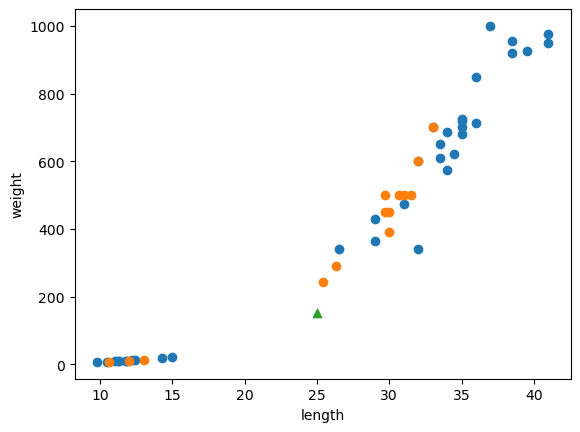

In [6]:
# 시각화
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.scatter(25, 150, marker='^') # 분류 대상 표시
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 그래프로 확인해보면 25cm에 150g이면 도미로 분류해야 하는데 빙어로 분류됨
- 왜일까?

# 넘파이를 활용하여 다시 준비하기

- 훈련 데이터를 만드는 작업에 넘파이를 활용

In [7]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [8]:
# 넘파이 모듈 임포트
import numpy as np

In [9]:
# 같은 인덱스끼리 묶어줌
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [10]:
# column_stack() 함수를 활용하여 생선 길이데이타와 무게 데이터를 합침
fish_data = np.column_stack((fish_length, fish_weight))
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [11]:
# 1또는 0을 가지는 넘파이배열을 생성하는 함수
np.ones(5), np.zeros(5)

(array([1., 1., 1., 1., 1.]), array([0., 0., 0., 0., 0.]))

In [12]:
# concatenate()함수는 넘파이 배열을 이어붙임
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [13]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 데이터 나누기
- 사이킷런에서 제공하는 함수를 활용하여 훈련/테스트 데이터를 분할

In [14]:
# train_test_split함수 임포트
from sklearn.model_selection import train_test_split

In [33]:
# train_test_split함수를 사용하여 데이터셋 나누기
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [23]:
# 나누어진 데이터셋의 모양 확인
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((36, 2), (13, 2), (36,), (13,))

In [34]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [52]:
# stratify=fish_target 옵션을 추가하여 train_test_split함수로 데이터셋 분할하기
# 타겟에 들어있는 값들의 비율로 분할됨
X_train, X_test, y_train, y_test = \
    train_test_split(fish_data, fish_target, stratify=fish_target)

In [53]:
y_test

array([1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.])

In [54]:
# KNeighborsClassifier 임포트하기
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier 객체 생성
model = KNeighborsClassifier()

# 학습하기
model.fit(X_train, y_train) # (train_input, train_target)

# 모델 정확도 평가 점수 확인
model.score(X_test, y_test)

1.0

In [56]:
# 25,150 예측 하기
model.predict([[25,150]]) 

array([0.])

- 여전히 결과가 빙어로 처리된다.

In [57]:
# [25,150]의 이웃 개수 확인
distances, indexes = model.kneighbors([[25,150]])
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 137.17988191 140.00603558]]
[[ 5  0 21  8 10]]


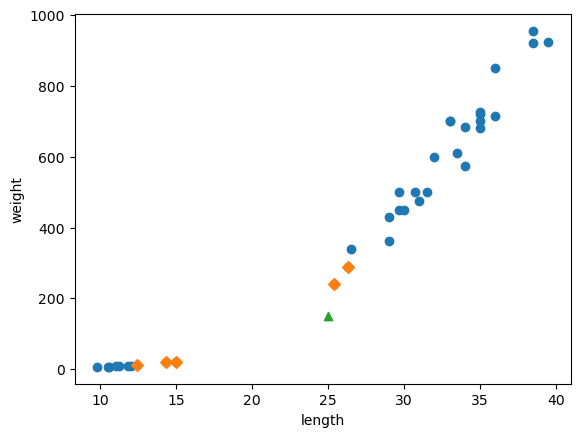

In [59]:
# 시각화 하여 확인
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(X_train[indexes,0], X_train[indexes,1], marker='D')
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 왜 더 가까운 도미가 이웃이 아니라 빙어가 이웃으로 판단되는걸까?

- k-최근접 이웃 알고리즘은 주변의 샘플 중 가까운 것이 다수인 클래스를 예측
- 이웃들 중 가장 가까운 5개를 찾아 분류 결과를 예측함
- 가깝다라는 기준을 distances로 확인할 수 있는데 거리 비율이 이상함
- [ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]
- x축 범위 (10 ~ 40)
- y축 범위 (0 ~ 1000)
- y축으로 조금만 떨어져도 크게 달라지는 것

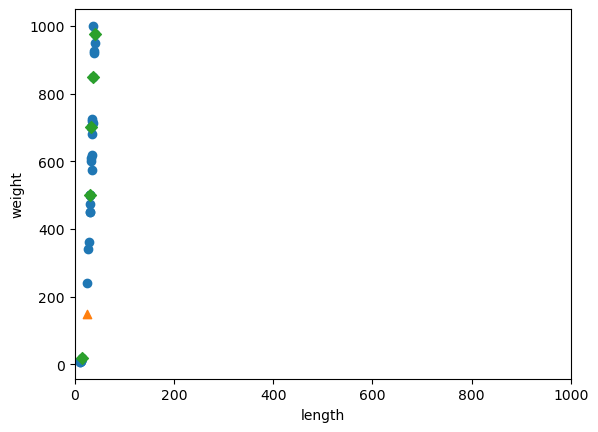

In [60]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000)) # x축의 기준범위 변경. ylim은 y축의 기준범위 변경
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 위와 같이 만들면 생선의 무게가 분류 기준이 될 수 있음
- 길이와 무게가 서로 값의 범위가 달라서 생긴 문제(Scale이 다름)
- 데이터를 표현하는 기준이 다르면 결과가 올바르지 않음
- 거리기반의 알고리즘인 kNN뿐만 아니라 모든 알고리즘에서 영향이 있을 수 있음

#### 따라서 샘플들의 값을 일정한 기준으로 맞출 필요가 있음

# 데이터 전처리
- 모델의 결과가 유의미 하기 위해 반드시 데이터 전처리 과정이 필요
- 앞서 확인한 것과 같이 모델을 통한 결과에 문제가 발생할 수 있음
- 이러한 문제를 덜 발생시키도록 데이터의 전처리는 매우 중요함
- 전처리는 일반적으로 표준점수(standard score)를 사용(z점수라고도 함)

- 표준점수는 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄
- 표준점수를 이용하면 특성값의 크기를 동일한 조건으로 만들어 비교 가능

In [61]:
# 분산: 데이터에서 평균을 뺀 값을 모두 제곱한 후 평균값
# 표준편차: 분산의 제곱근. 데이터가 분산된 정도를 의미
# 표준점수: 데이터가 원점에서 얼마만큼의 표준편차만큼 떨어져 있는가를 나타내는 값

# 표준점수 구하기
mean = np.mean(X_train, axis=0) #평균. axis=0은 행을 축으로 함
std = np.std(X_train, axis=0) # 표준편차. axis=0은 행을 축으로 함
print(mean, std)

[ 26.81666667 436.45555556] [  9.82738521 309.74957219]


#### 브로드캐스팅
- 넘파이 배열 연산을 할 때 모든 행을 대상으로 진행되는 것을 말함
- 값이 하나인 평균과 표준편차가 넘파이 배열의 모든 행과 열에 연산이 적용되는 것

In [63]:
X_train_scaled = (X_train - mean) / std # 넘파이 배열 연산은 모든 행을 대상으로 계산됨
print(X_train_scaled)

[[-1.20242225 -1.34481398]
 [ 0.93446356  1.33509287]
 [ 0.39515428  0.2051478 ]
 [ 0.83270709  0.91539899]
 [ 0.73095062  0.44727889]
 [-0.144155   -0.62778313]
 [-1.65015071 -1.38646053]
 [ 0.83270709  0.8508307 ]
 [-1.46698907 -1.36579868]
 [ 0.29339781  0.2051478 ]
 [-0.05257417 -0.47281923]
 [ 0.47655945  0.2051478 ]
 [ 0.68007239  0.5602734 ]
 [ 0.93446356  0.8960285 ]
 [-1.58909683 -1.37742097]
 [ 1.29061119  1.57722395]
 [ 0.32392475  0.04372708]
 [ 0.29339781  0.04372708]
 [ 0.22216829 -0.23714498]
 [-1.73155588 -1.38742905]
 [ 0.83270709  0.78626241]
 [-1.27365178 -1.34545966]
 [ 0.83270709  0.93154106]
 [ 0.42568122  0.12443744]
 [-0.03222288 -0.31139851]
 [ 0.22216829 -0.02084121]
 [-1.66032636 -1.38484632]
 [ 0.62919416  0.8508307 ]
 [ 0.73095062  0.80240448]
 [-1.52804295 -1.37709813]
 [ 0.62919416  0.8508307 ]
 [ 1.18885472  1.67407639]
 [-1.50769166 -1.37742097]
 [ 0.52743769  0.52798925]
 [ 1.18885472  1.56108188]
 [-1.60944812 -1.37774381]]


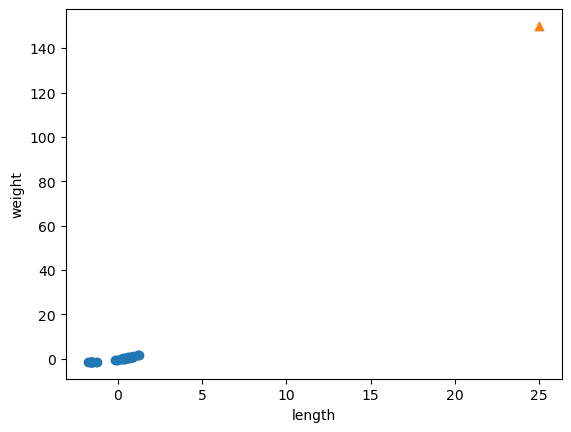

In [64]:
# 표준 점수로 변환된 train_scaled를 시각화
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 값의 범위가 달라져서 25, 150역시 스케일링 필요
- 훈련세트의 mean, std값으로 스케일링해야 함

In [65]:
# [25, 150]를 훈련데이터셋의 스케일링과 동일하게 변경
new = ([25, 150] - mean) / std
new

array([-0.18485758, -0.92479726])

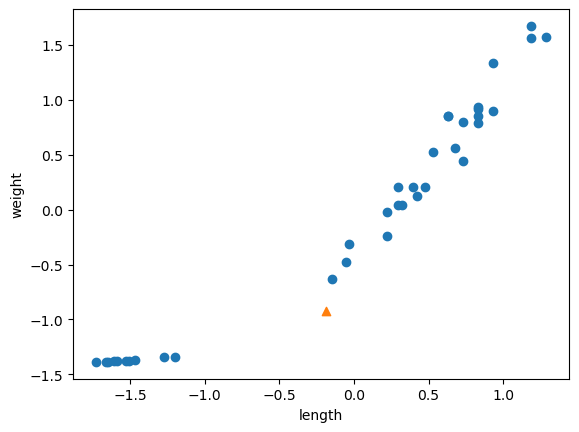

In [67]:
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 스케일링 하기 전과 형태가 거의 동일함.
- 값의 크기만 일정하게 변환되었음

### 다시 모델을 정의하여 테스트

In [69]:
# KNeighborsClassifier 임포트하기
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier 객체 생성
model = KNeighborsClassifier()

# 학습하기
model.fit(X_train_scaled, y_train)

# 모델 정확도 평가 점수 확인
# 테스트 데이터(test_input)도 훈련데이터로 만든 기준으로 스케일링
X_test_scaled = (X_test - mean) / std
model.score(X_test_scaled, y_test)

1.0

In [71]:
# 25, 150을 스케일링한 값으로 예측 테스트
print(model.predict([new]))

[1.]


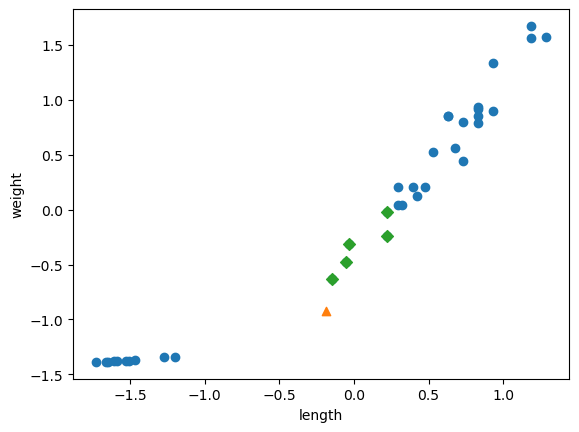

In [73]:
# 이웃 정보 확인하기
distances, indexes = model.kneighbors([new])
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(X_train_scaled[indexes,0], X_train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 여기까지 정리하기